Imports

In [14]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

First look at data and column types

In [3]:
# Load files with low_memory=False to suppress DtypeWarnings temporarily
df1 = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/sba_project/2020-present.csv', low_memory=False)
df2 = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/sba_project/2010-2019.csv', low_memory=False)
df3 = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/sba_project/2000-2009.csv', low_memory=False)

# Print first few rows of each file
print("df1 (2020-present.csv):")
print(df1.head(), end="\n\n")

print("df2 (2010-2019.csv):")
print(df2.head(), end="\n\n")

print("df3 (2000-2009.csv):")
print(df3.head(), end="\n\n")

# Print column names to identify dtype mismatch sources
print("Columns in df1:")
print(df1.columns.tolist(), end="\n\n")

print("Columns in df2:")
print(df2.columns.tolist(), end="\n\n")

print("Columns in df3:")
print(df3.columns.tolist())


df1 (2020-present.csv):
    AsOfDate Program                   BorrName              BorrStreet  \
0  3/31/2025      7A        119 Roberts Ave LLC       119 W Roberts Ave   
1  3/31/2025      7A         22 NY Cleaners Inc          28 E. 22nd St.   
2  3/31/2025      7A      3DB Home Services Inc            539 BROADWAY   
3  3/31/2025      7A    513 SOLUTIONS GROUP LLC        120 FIREBIRD RUN   
4  3/31/2025      7A  5770 Brookhollow Pkwy LLC  5770 Brook Hollow Pkwy   

   BorrCity BorrState  BorrZip  LocationID  \
0  WILDWOOD        NJ     8260       16710   
1  NEW YORK        NY    10010      124112   
2    TACOMA        WA    98402       53803   
3    CIBOLO        TX    78108      123499   
4  Norcross        GA    30071      398147   

                                       BankName  BankFDICNumber  ...  \
0          Wilmington Savings Fund Society, FSB         17838.0  ...   
1                           New Millennium Bank         35151.0  ...   
2               U.S. Bank, Natio

Rename columns in df3 to match df2/1

In [4]:
# Load CSV files with low_memory=False
df1 = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/sba_project/2020-present.csv', low_memory=False)
df2 = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/sba_project/2010-2019.csv', low_memory=False)
df3 = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/sba_project/2000-2009.csv', low_memory=False)

# Rename df3 columns to match df1/df2
df3 = df3.rename(columns={
    'AsofDate': 'AsOfDate',
    'ApprovalFY': 'ApprovalFiscalYear',
    'FixedorVariableInterestRate': 'FixedOrVariableInterestInd',
    'TerminMonths': 'TermInMonths',
    'NAICSCode': 'NaicsCode',
    'NAICSDescription': 'NaicsDescription',
    'PaidinFullDate': 'PaidInFullDate',
    'ChargeoffDate': 'ChargeOffDate',
    'GrossChargeoffAmount': 'GrossChargeOffAmount',
    'SoldSecondMarketInd': 'SoldSecMrktInd'
})

# Reorder df3 columns to match df1
df3 = df3[df1.columns]

# Check column alignment
print("Column alignment checks:")
print("df1 vs df2:", df1.columns.equals(df2.columns))  # Should be True
print("df1 vs df3:", df1.columns.equals(df3.columns))  # Should be True
print()

# Merge the DataFrames
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save to CSV
merged_df.to_csv('/Users/caitlyndinh/ai-academy/FinalProject/merged_output.csv', index=False)

print("Files cleaned and merged into 'merged_output.csv'")


Column alignment checks:
df1 vs df2: True
df1 vs df3: True

Files cleaned and merged into 'merged_output.csv'


data overview and quality assessment

In [5]:
import pandas as pd

# Load the merged CSV file
df = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/merged_output.csv', low_memory=False)

print("DATA OVERVIEW")
print("=" * 40)
print(f" Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n Column Names:")
print(df.columns.tolist())
print("\n Data Types:")
print(df.dtypes)
print("\n")

print("MISSING VALUE SUMMARY")
print("=" * 40)
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({
    "MissingCount": missing,
    "MissingPercent": missing_percent.map("{:.2f}%".format)
})
print(missing_summary[missing > 0].sort_values(by="MissingCount", ascending=False))
print("\n")

print("UNIQUE VALUE SUMMARY")
print("=" * 40)
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
print("\n")

print(" DESCRIPTIVE STATISTICS (Numeric Columns)")
print("=" * 40)
print(df.describe(include='number'))
print("\n")

print(" DESCRIPTIVE STATISTICS (Categorical Columns)")
print("=" * 40)
print(df.describe(include='object'))
print("\n")

print(" DUPLICATE CHECK")
print("=" * 40)
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates:,}")


DATA OVERVIEW
 Shape: 1,548,278 rows × 43 columns

 Column Names:
['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip', 'LocationID', 'BankName', 'BankFDICNumber', 'BankNCUANumber', 'BankStreet', 'BankCity', 'BankState', 'BankZip', 'GrossApproval', 'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate', 'ProcessingMethod', 'Subprogram', 'InitialInterestRate', 'FixedOrVariableInterestInd', 'TermInMonths', 'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName', 'ProjectCounty', 'ProjectState', 'SBADistrictOffice', 'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus', 'PaidInFullDate', 'ChargeOffDate', 'GrossChargeOffAmount', 'RevolverStatus', 'JobsSupported', 'CollateralInd', 'SoldSecMrktInd']

 Data Types:
AsOfDate                       object
Program                        object
BorrName                       object
BorrStreet                     object
BorrCity                       object
Borr

Mapping in Naics

In [6]:
import pandas as pd

# === Load both files ===
merged_df = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/merged_output.csv', low_memory=False)
naics_master = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/sba_project/naics_master.csv', dtype=str)

# === Clean and format codes as strings ===
# Remove any decimal artifacts and whitespace
merged_df['NaicsCode_clean'] = merged_df['NaicsCode'].astype(str).str.strip().str.replace(r'\.0$', '', regex=True)
naics_master['NAICSCODE'] = naics_master['NAICSCODE'].astype(str).str.strip()

# === Merge on cleaned NAICS code ===
merged_df = merged_df.merge(
    naics_master[['NAICSCODE', 'NAICSTITLE']],
    how='left',
    left_on='NaicsCode_clean',
    right_on='NAICSCODE'
)

# === Apply mapped title to NaicsDescription column ===
merged_df['NaicsDescription'] = merged_df['NAICSTITLE']

# === Report rows that failed to map ===
missing_count = merged_df['NaicsDescription'].isnull().sum()
print(f"NAICS description not found for {missing_count:,} rows.")

# Optional: save failed mappings for manual review
if missing_count > 0:
    unmapped_df = merged_df[merged_df['NaicsDescription'].isnull()]
    unmapped_df.to_csv('/Users/caitlyndinh/ai-academy/FinalProject/unmapped_naics_codes.csv', index=False)
    print("Unmapped rows saved to 'unmapped_naics_codes.csv'")

# === Final cleanup ===
merged_df.drop(columns=['NAICSCODE', 'NAICSTITLE', 'NaicsCode_clean'], inplace=True)

# === Save the updated dataset ===
merged_df.to_csv('/Users/caitlyndinh/ai-academy/FinalProject/merged_with_naics.csv', index=False)
print("NAICS descriptions successfully mapped and saved to 'merged_with_naics.csv'")


NAICS description not found for 19,780 rows.
Unmapped rows saved to 'unmapped_naics_codes.csv'
NAICS descriptions successfully mapped and saved to 'merged_with_naics.csv'


Exploratory Analysis

In [7]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/merged_with_naics.csv', low_memory=False)

print("EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# === 1. Basic overview ===
print(f"\nDataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

# === 2. Missing values ===
print("\nMissing value summary:")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

# === 3. Duplicate rows ===
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates:,}")

# === 4. Top industries (NAICS) ===
print("\n Top 10 industries by number of loans:")
print(df['NaicsDescription'].value_counts().head(10))

# === 5. Top lenders ===
if 'BankName' in df.columns:
    print("\n Top 10 banks by loan count:")
    print(df['BankName'].value_counts().head(10))

# === 6. Approval amount stats ===
if 'GrossApproval' in df.columns:
    df['GrossApproval'] = pd.to_numeric(df['GrossApproval'], errors='coerce')
    print("\n Loan amount statistics (GrossApproval):")
    print(df['GrossApproval'].describe())

# === 7. Job support stats ===
if 'JobsSupported' in df.columns:
    df['JobsSupported'] = pd.to_numeric(df['JobsSupported'], errors='coerce')
    print("\n Jobs supported per loan:")
    print(df['JobsSupported'].describe())

# === 8. Charge-off analysis ===
if 'LoanStatus' in df.columns and 'GrossChargeOffAmount' in df.columns:
    df['GrossChargeOffAmount'] = pd.to_numeric(df['GrossChargeOffAmount'], errors='coerce')
    chargeoffs = df[df['LoanStatus'] == 'CHGOFF']
    print(f"\n Charge-offs: {len(chargeoffs):,} loans")
    print(" Charge-off amount statistics:")
    print(chargeoffs['GrossChargeOffAmount'].describe())

# === 9. Loans by year ===
if 'ApprovalFiscalYear' in df.columns:
    print("\nLoans by fiscal year:")
    print(df['ApprovalFiscalYear'].value_counts().sort_index())

print("\n EDA complete.")


EXPLORATORY DATA ANALYSIS

Dataset shape: 1,548,278 rows × 43 columns

Column names:
['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrState', 'BorrZip', 'LocationID', 'BankName', 'BankFDICNumber', 'BankNCUANumber', 'BankStreet', 'BankCity', 'BankState', 'BankZip', 'GrossApproval', 'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate', 'ProcessingMethod', 'Subprogram', 'InitialInterestRate', 'FixedOrVariableInterestInd', 'TermInMonths', 'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName', 'ProjectCounty', 'ProjectState', 'SBADistrictOffice', 'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus', 'PaidInFullDate', 'ChargeOffDate', 'GrossChargeOffAmount', 'RevolverStatus', 'JobsSupported', 'CollateralInd', 'SoldSecMrktInd']

Data types:
AsOfDate                       object
Program                        object
BorrName                       object
BorrStreet                     object
BorrCity                

Visual Exploratory Analysis

VISUAL EXPLORATORY ANALYSIS


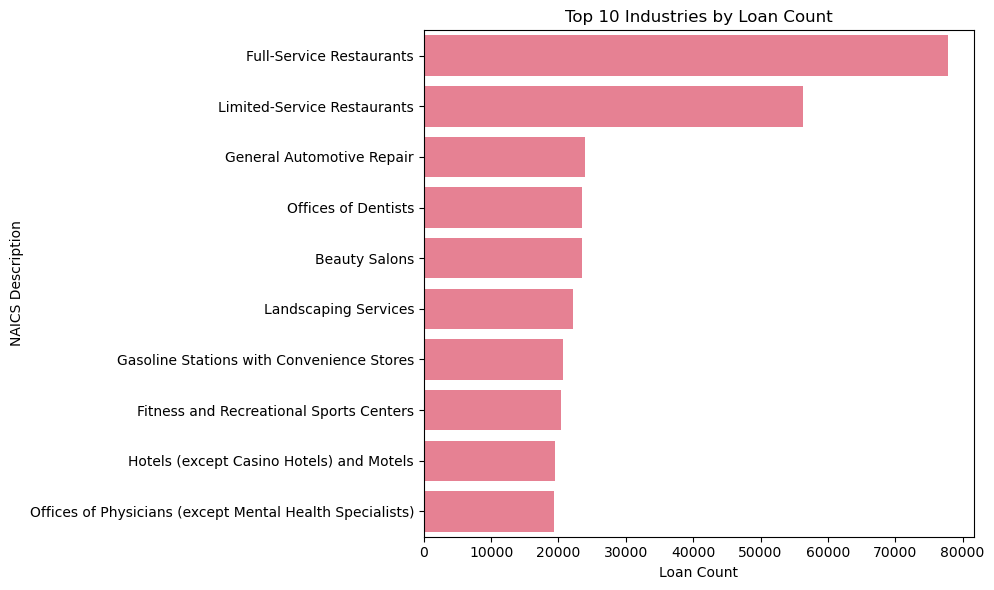

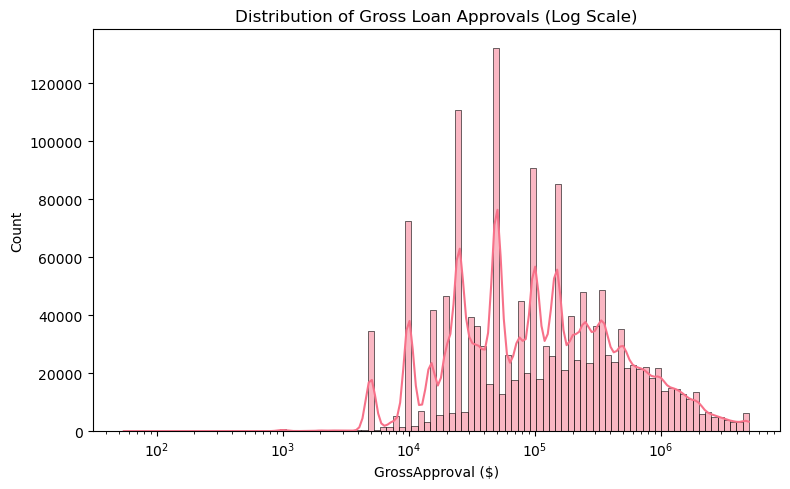

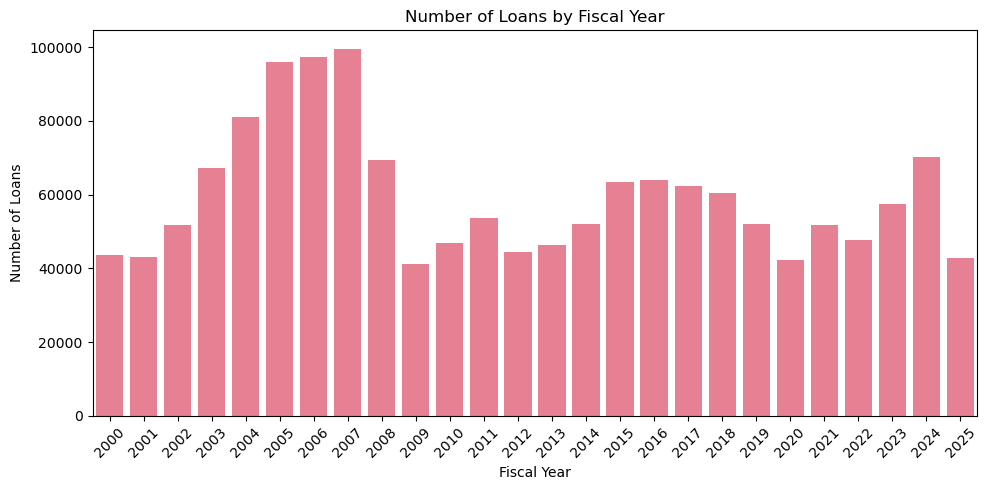

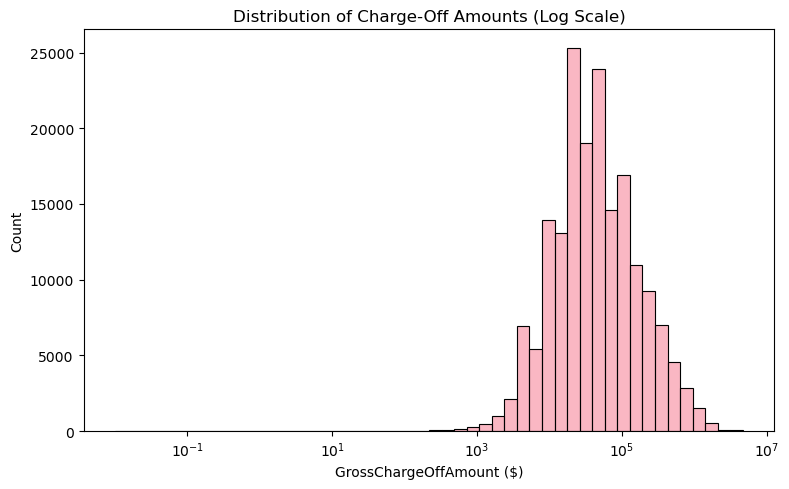

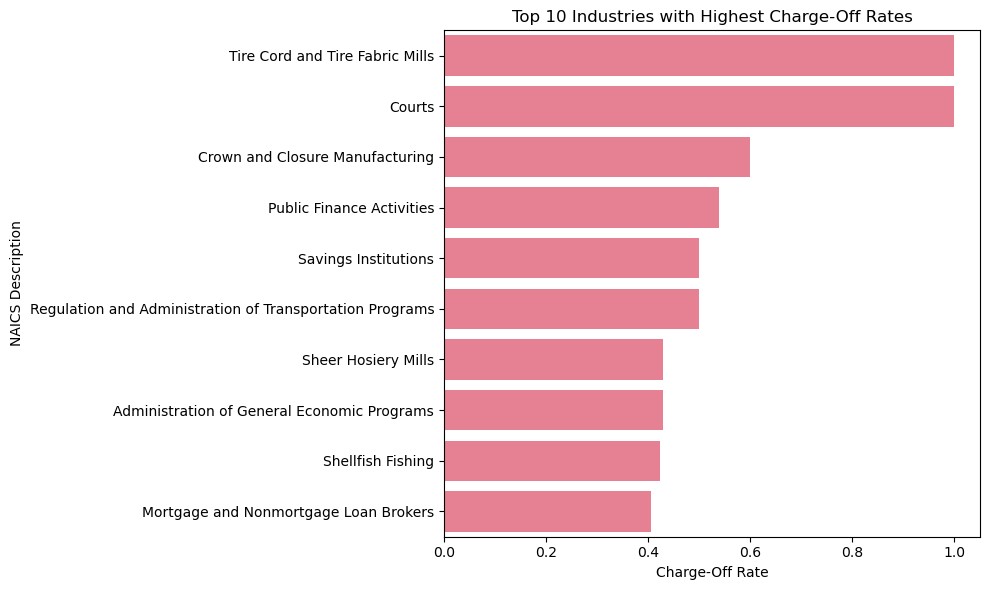

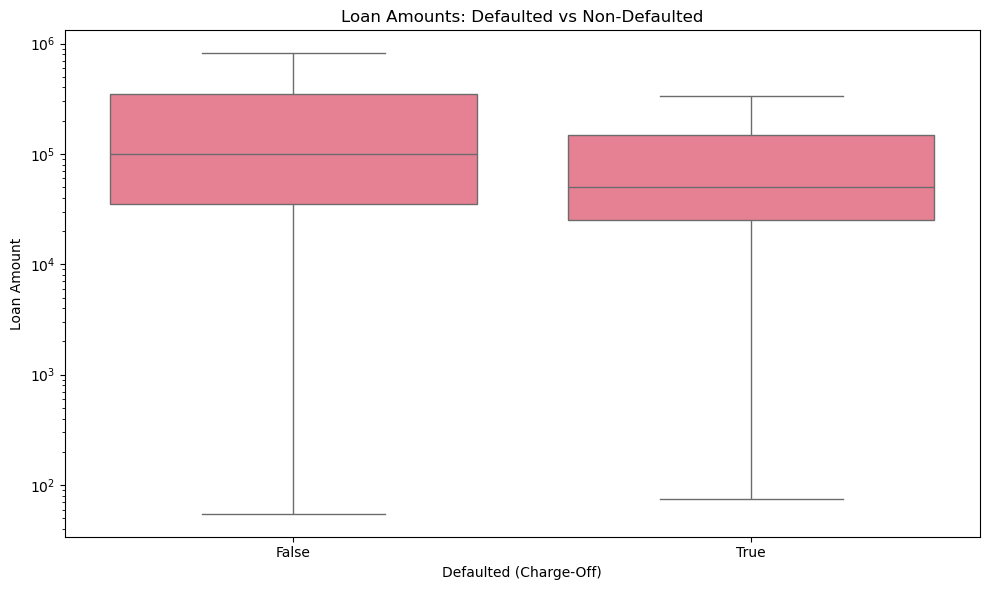

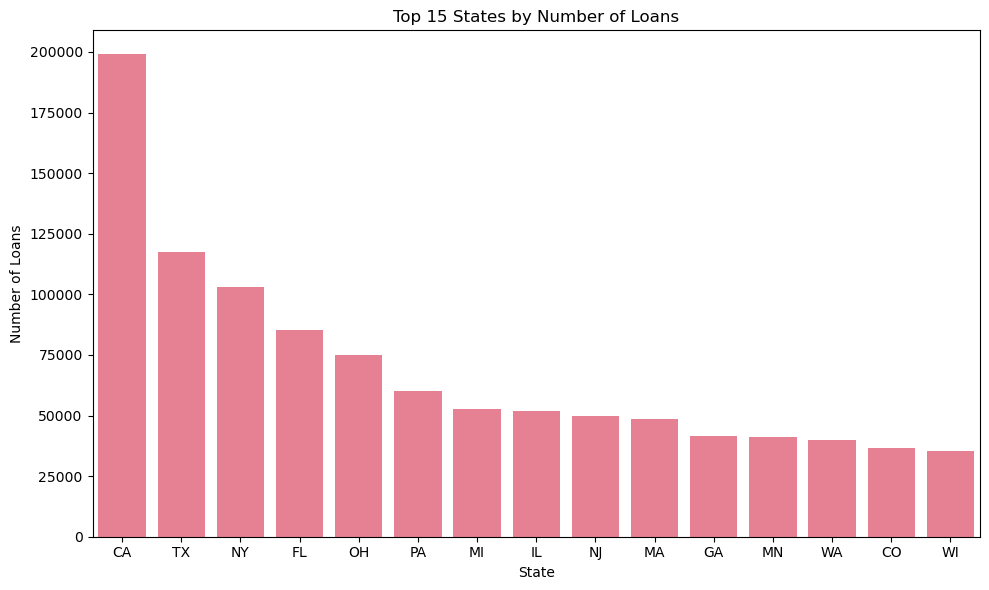

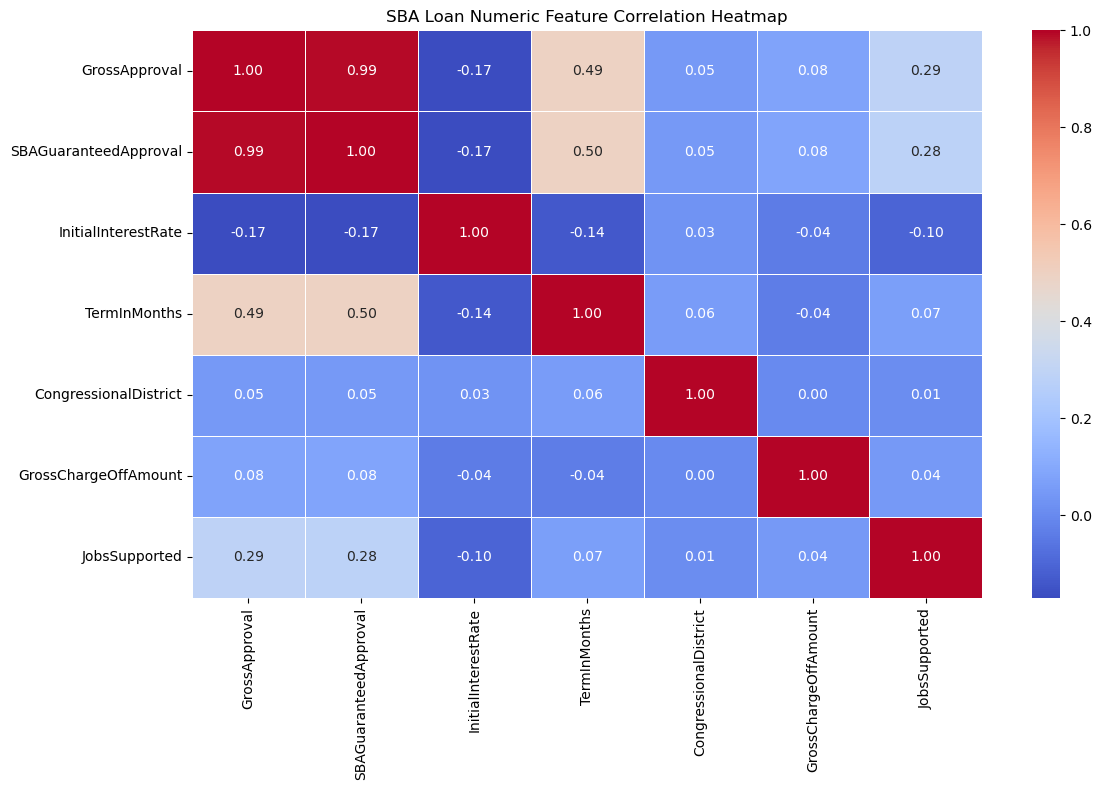

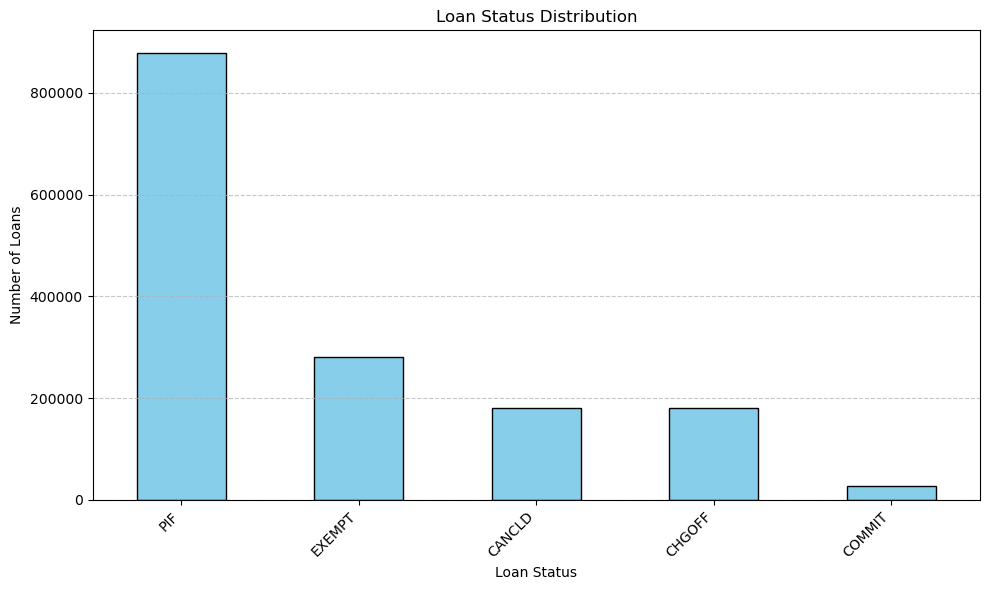

Number of unique banks: 4681

Top 10 Banks by Number of Locations:
BankName
First State Bank                         30
Farmers State Bank                       16
First National Bank                      16
Peoples Bank                             15
First Community Bank                     14
First Midwest Bank                       13
Citizens State Bank                      13
MUFG Union Bank, National Association    12
Security State Bank                      11
First Bank                               11
Name: LocationID, dtype: int64


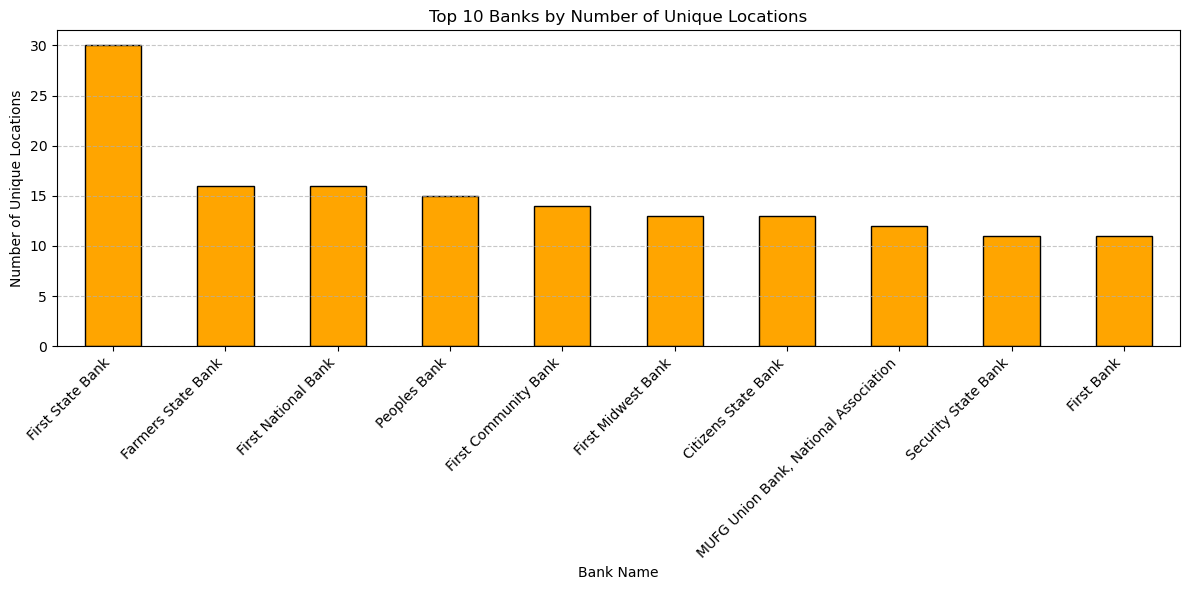


 Visual EDA complete.


In [11]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

# Load data
df = pd.read_csv('/Users/caitlyndinh/ai-academy/FinalProject/merged_with_naics.csv', low_memory=False)

print("VISUAL EXPLORATORY ANALYSIS")
print("=" * 50)

# Clean key numeric columns
df['GrossApproval'] = pd.to_numeric(df['GrossApproval'], errors='coerce')
df['JobsSupported'] = pd.to_numeric(df['JobsSupported'], errors='coerce')
df['GrossChargeOffAmount'] = pd.to_numeric(df['GrossChargeOffAmount'], errors='coerce')

# ======================
# Plot 1: Top 10 NAICS Industries by Loan Count
# ======================
top_naics = df['NaicsDescription'].value_counts().dropna().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_naics.index, x=top_naics.values)
plt.title("Top 10 Industries by Loan Count")
plt.xlabel("Loan Count")
plt.ylabel("NAICS Description")
plt.tight_layout()
plt.show()

# ======================
# Plot 2: Distribution of Gross Loan Amounts (Log Scale)
# ======================
plt.figure(figsize=(8, 5))
sns.histplot(df['GrossApproval'], bins=100, kde=True, log_scale=(True, False))
plt.title("Distribution of Gross Loan Approvals (Log Scale)")
plt.xlabel("GrossApproval ($)")
plt.tight_layout()
plt.show()

# ======================
# Plot 3: Loans by Fiscal Year
# ======================
if 'ApprovalFiscalYear' in df.columns:
    plt.figure(figsize=(10, 5))
    year_counts = df['ApprovalFiscalYear'].value_counts().sort_index()
    sns.barplot(x=year_counts.index.astype(str), y=year_counts.values)
    plt.title("Number of Loans by Fiscal Year")
    plt.xlabel("Fiscal Year")
    plt.ylabel("Number of Loans")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ======================
# Plot 4: Charge-Off Amount Distribution (Log Scale)
# ======================
if 'LoanStatus' in df.columns:
    chargeoffs = df[df['LoanStatus'] == 'CHGOFF']
    plt.figure(figsize=(8, 5))
    sns.histplot(chargeoffs['GrossChargeOffAmount'], bins=50, kde=True, log_scale=(True, False))
    plt.title("Distribution of Charge-Off Amounts (Log Scale)")
    plt.xlabel("GrossChargeOffAmount ($)")
    plt.tight_layout()
    plt.show()

# ======================
# Plot 5: Charge-Off Rates by Industry
# ======================
industry_chargeoff = df.groupby('NaicsDescription')['ChargeOffDate'].apply(lambda x: x.notna().mean()).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=industry_chargeoff.values, y=industry_chargeoff.index)
plt.title('Top 10 Industries with Highest Charge-Off Rates')
plt.xlabel('Charge-Off Rate')
plt.ylabel('NAICS Description')
plt.tight_layout()
plt.show()

# ======================
# Plot 6: Defaulted vs Non-Defaulted Loan Amounts
# ======================

df['Defaulted'] = df['ChargeOffDate'].notna()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Defaulted', y='GrossApproval', showfliers=False)
plt.title('Loan Amounts: Defaulted vs Non-Defaulted')
plt.xlabel('Defaulted (Charge-Off)')
plt.ylabel('Loan Amount')
plt.yscale('log')
plt.tight_layout()
plt.show()

# ======================
# Plot 7: State-wise Loan Disbursement (Top 15 States)
# ======================

top_states = df['BorrState'].value_counts().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 15 States by Number of Loans')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.tight_layout()
plt.show()

# ======================
# Plot 8: Heat Map
# ======================

# Step 1: Define potential numeric columns
numeric_cols = [
    'GrossApproval',
    'SBAGuaranteedApproval',
    'InitialInterestRate',
    'TermInMonths',
    'CongressionalDistrict',
    'BusinessAge',
    'GrossChargeOffAmount',
    'JobsSupported'
]

# Step 2: Convert to numeric safely
heatmap_df = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Drop constant columns (zero variance)
heatmap_df = heatmap_df.loc[:, heatmap_df.nunique() > 1]

# Step 4: Drop rows with missing values
heatmap_df.dropna(inplace=True)

# Step 5: Calculate and plot correlation matrix
corr_matrix = heatmap_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("SBA Loan Numeric Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# ======================
# Plot 9: Loan status distribution
# ======================

# Count the occurrences of each LoanStatus
loan_status_counts = df['LoanStatus'].value_counts().sort_values(ascending=False)

# Plot the LoanStatus counts
plt.figure(figsize=(10, 6))
loan_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ======================
# Plot 10: Number of banks and locations
# ======================

# 1. Count the number of different banks
num_unique_banks = df['BankName'].nunique()
print(f"Number of unique banks: {num_unique_banks}")

# 2. Number of unique locations for each bank
# Assuming LocationID is a unique identifier for a physical location
bank_location_counts = df.groupby('BankName')['LocationID'].nunique().sort_values(ascending=False)

# Display top 10 banks by number of unique locations
print("\nTop 10 Banks by Number of Locations:")
print(bank_location_counts.head(10))

plt.figure(figsize=(12, 6))
bank_location_counts.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Banks by Number of Unique Locations")
plt.xlabel("Bank Name")
plt.ylabel("Number of Unique Locations")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n Visual EDA complete.")
